**Importing Packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, confusion_matrix, f1_score, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

**Importing Data**

In [ ]:
sales = pd.read_csv('sales_data.csv')

**Data Description**

In [ ]:
description = sales.describe(include='all')
print("\nData Description:")
print(description)


Data Description:
         flag gender        education     house_val     age online marriage  \
count   40000  40000            39259  4.000000e+04   40000  40000    25973   
unique      2      3                5           NaN       7      2        2   
top         Y      M  2. Some College           NaN  5_<=55      Y  Married   
freq    20000  22019            11400           NaN    8103  27319    20891   
mean      NaN    NaN              NaN  3.072138e+05     NaN    NaN      NaN   
std       NaN    NaN              NaN  4.222146e+05     NaN    NaN      NaN   
min       NaN    NaN              NaN  0.000000e+00     NaN    NaN      NaN   
25%       NaN    NaN              NaN  8.065725e+04     NaN    NaN      NaN   
50%       NaN    NaN              NaN  2.148720e+05     NaN    NaN      NaN   
75%       NaN    NaN              NaN  3.937620e+05     NaN    NaN      NaN   
max       NaN    NaN              NaN  9.999999e+06     NaN    NaN      NaN   

        child    occupation mort

**Missing Information Plot**

Number of 'N' in 'flag' column when 'online' is 'Y': 11668
Missing Information:
flag               0
gender             0
education        741
house_val          0
age                0
online             0
marriage       14027
child              0
occupation         0
mortgage           0
house_owner     3377
region             0
fam_income         0
dtype: int64
Missing Information(%):
flag            0.0000
gender          0.0000
education       1.8525
house_val       0.0000
age             0.0000
online          0.0000
marriage       35.0675
child           0.0000
occupation      0.0000
mortgage        0.0000
house_owner     8.4425
region          0.0000
fam_income      0.0000
dtype: float64


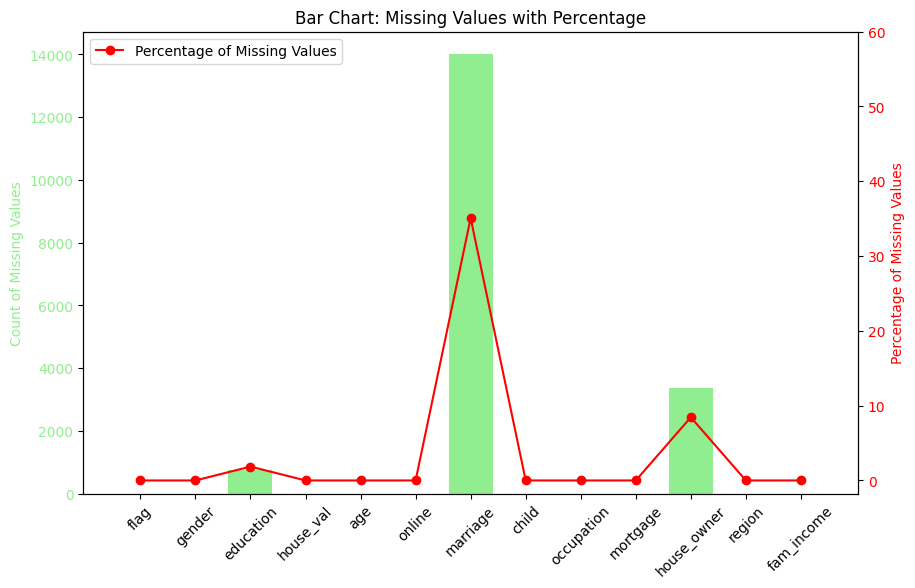

In [ ]:
count_N_when_online_Y = sales[sales['online'] == 'Y']['flag'].value_counts().get('N', 0)

print(f"Number of 'N' in 'flag' column when 'online' is 'Y': {count_N_when_online_Y}")

# Missing information
missing_info = sales.isnull().sum()
print("Missing Information:")
print(missing_info)

# Calculate missing percentage
missing_percentage = 100 * sales.isnull().sum() / len(sales)
print("Missing Information(%):")
print(missing_percentage)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))
plt.xticks(rotation=45)


# Actual count of missing values (left y-axis)
color = 'lightgreen'
ax1.bar(sales.columns, sales.isnull().sum(), color=color, label='Count of Missing Values')
ax1.set_ylabel('Count of Missing Values', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Percentage of missing values (right y-axis)
ax2 = ax1.twinx()
color = 'red'
ax2.plot(sales.columns, missing_percentage, color=color, marker='o', label='Percentage of Missing Values')
ax2.set_ylabel('Percentage of Missing Values', color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.yticks([0, 10, 20, 30, 40, 50, 60])
# Title and labels
plt.title('Bar Chart: Missing Values with Percentage')
plt.xlabel('Variables', rotation=45)
plt.legend(loc='upper left')

plt.show()

**Replacing Function**

In [ ]:
import pandas as pd
import numpy as np

# Filling the missing values in marriage based on child ('Y')
sales.loc[(sales['marriage'].isna() & (sales['child'] == 'Y')), 'marriage'] = 'Married'

# Further imputing the remaining missing values in marriage with mode
marriage_mode = sales['marriage'].mode()[0]
sales['marriage'].fillna(marriage_mode, inplace=True)

# Replacing 0 with N in the 'child' column
sales['child'] = sales['child'].replace('0', 'N')

# Removing rows where 'house_owner' or 'education' is missing
sales = sales.dropna(subset=['house_owner', 'education'])

# Update 'online' to 'N' where 'flag' is 'N' and 'online' is 'Y'
count_N_when_online_Y = (sales['online'] == 'Y') & (sales['flag'] == 'N')
count_N_when_online_Y
sales.loc[count_N_when_online_Y, 'online'] = 'N'

# Removing duplicate entries
sales = sales.drop_duplicates()
# Saving the modified sales data  to a new CSV file (sales_processed)
new_file_path = '/content/sample_data/sales_processed1.csv'
sales.to_csv(new_file_path, index=False)


In [ ]:
sales.shape[0]

35597

**Visualization - 1**

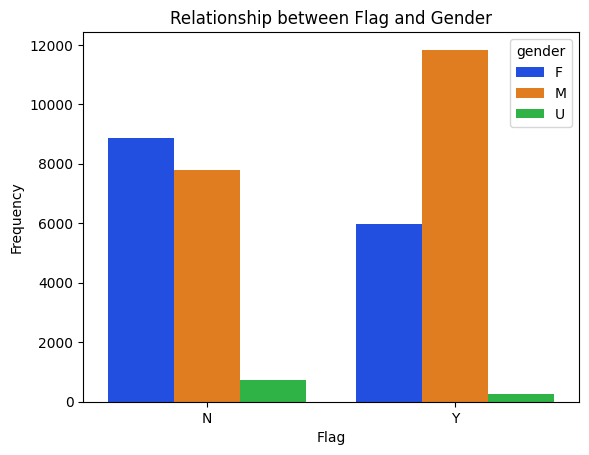

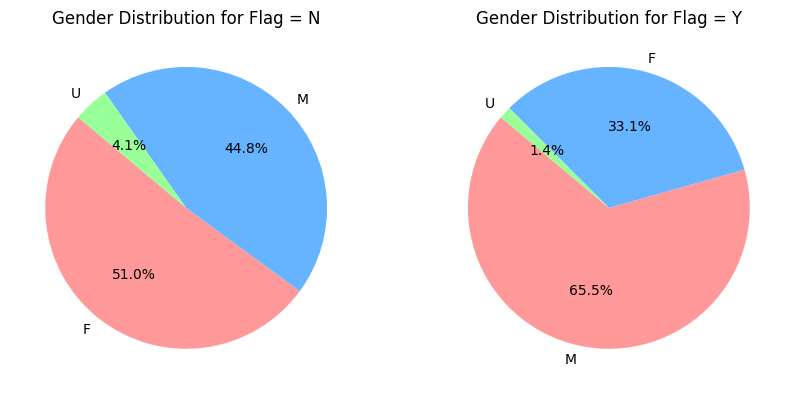

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sales_data = pd.read_csv('/content/sales_processed1.csv')

# Drawing a stacked bar chart
sns.countplot(x='flag', hue='gender', data=sales_data, palette='bright')
# Adding labels and title
plt.xlabel('Flag')
plt.ylabel('Frequency')
plt.title('Relationship between Flag and Gender')
# Displaying the chart
plt.show()

# Calculating the number of genders when flag is N
gender_counts_N = sales_data[sales_data['flag'] == 'N']['gender'].value_counts()
# Calculating the number of genders when flag is Y
gender_counts_Y = sales_data[sales_data['flag'] == 'Y']['gender'].value_counts()

# Creating pie charts
plt.figure(figsize=(10, 5))

# Pie chart for Flag = N
plt.subplot(1, 2, 1)
plt.pie(gender_counts_N, labels=gender_counts_N.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Gender Distribution for Flag = N')

# Pie chart for Flag = Y
plt.subplot(1, 2, 2)
plt.pie(gender_counts_Y, labels=gender_counts_Y.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Gender Distribution for Flag = Y')

# Displaying the pie charts
plt.show()


**Visualization - 2**

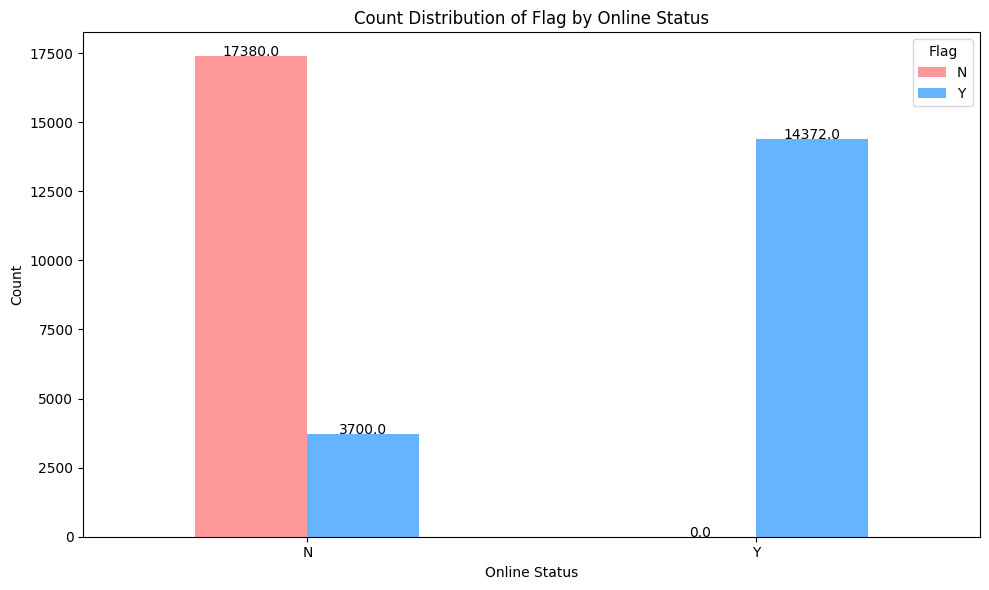

In [ ]:
# Calculating the flag distribution for each online status
online_flag_counts = sales_data.groupby(['online', 'flag']).size().unstack()

# Drawing a non-stacked bar chart with vibrant colors
ax = online_flag_counts.plot(kind='bar', figsize=(10, 6), color=['#FF9999', '#66B3FF', '#99FF99'])

# Adding labels and title
plt.xlabel('Online Status')
plt.ylabel('Count')
plt.title('Count Distribution of Flag by Online Status')

# Adding count labels to each bar
for p in ax.patches:
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + p.get_width() / 2, y + height), ha='center')

# Adjusting the legend's position
plt.legend(title='Flag', loc='upper right')

# Displaying the chart
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


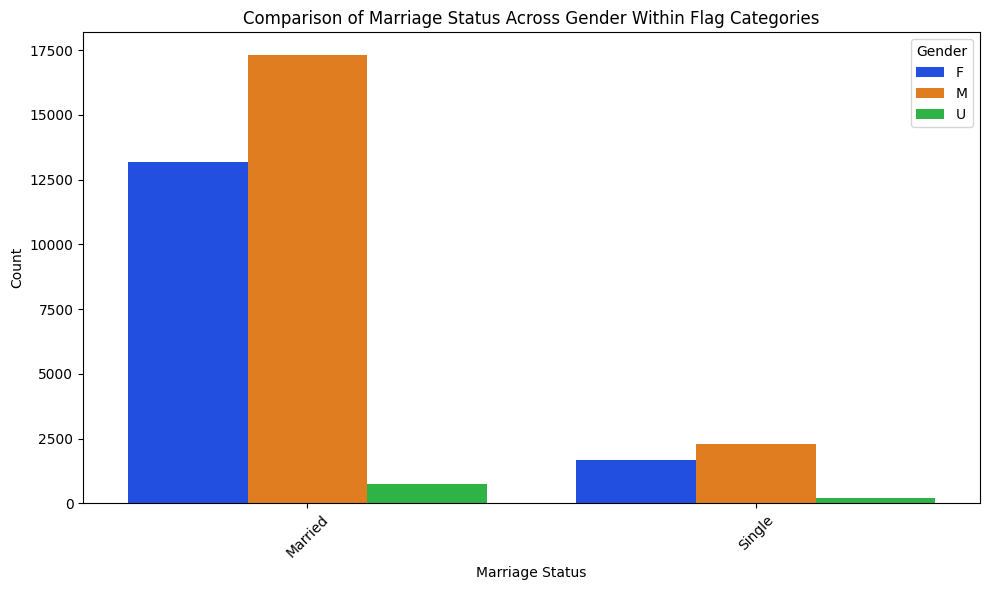

In [ ]:
# Creating a grouped bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='marriage', hue='gender', data=sales_data, palette='bright', dodge=True)

# Splitting by 'flag' using the 'hue' parameter for gender to differentiate within each marriage status
plt.title('Comparison of Marriage Status Across Gender Within Flag Categories')
plt.xlabel('Marriage Status')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Visualization - 3**

<ipython-input-28-ffb8fd77a1cc>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melted_data['region'] = melted_data[regions].idxmax(axis=1).str.replace('region_', '')


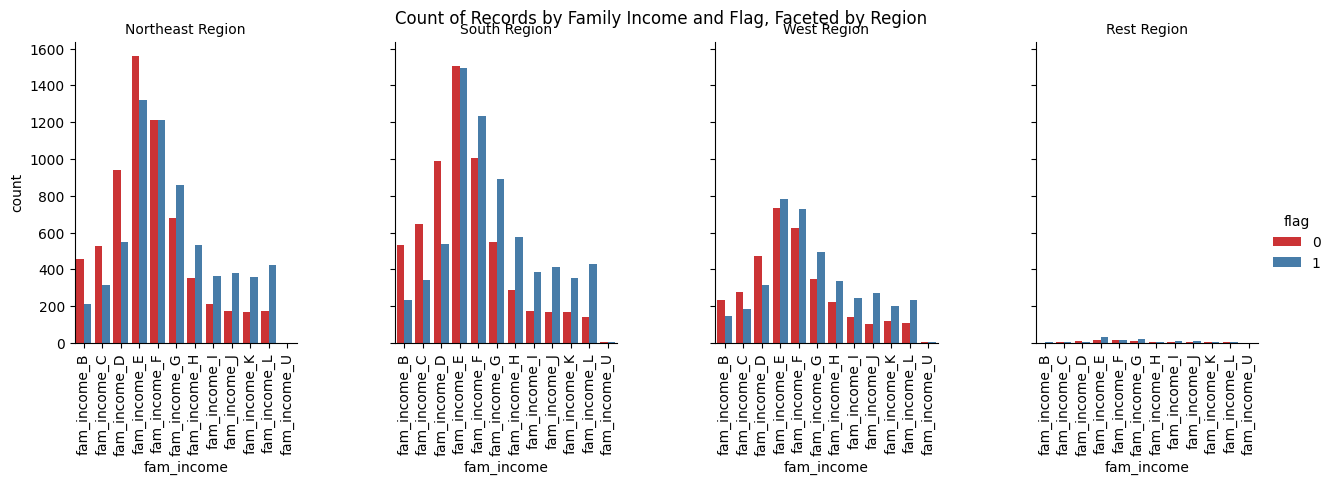

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `sales_data` is your original DataFrame

# Melting the DataFrame to aggregate family income categories
melted_data = pd.melt(sales_data, id_vars=['flag', 'region_Northeast', 'region_Rest', 'region_South', 'region_West'], value_vars=['fam_income_B', 'fam_income_C', 'fam_income_D', 'fam_income_E', 'fam_income_F', 'fam_income_G', 'fam_income_H', 'fam_income_I', 'fam_income_J', 'fam_income_K', 'fam_income_L', 'fam_income_U'], var_name='fam_income', value_name='count')

# Filtering out rows where the value in 'count' is 0, assuming 0 indicates absence of that category for the record
melted_data = melted_data[melted_data['count'] > 0]

# Consolidating region columns into a single 'region' column
regions = ['region_Northeast', 'region_Rest', 'region_South', 'region_West']
melted_data['region'] = melted_data[regions].idxmax(axis=1).str.replace('region_', '')

# Plotting
g = sns.catplot(x='fam_income', hue='flag', col='region', data=melted_data, kind='count', palette='Set1', col_wrap=4, height=4, aspect=0.8)
g.set_titles("{col_name} Region")
g.set_xticklabels(rotation=90)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Records by Family Income and Flag, Faceted by Region')
plt.show()


**Visualization - 4**

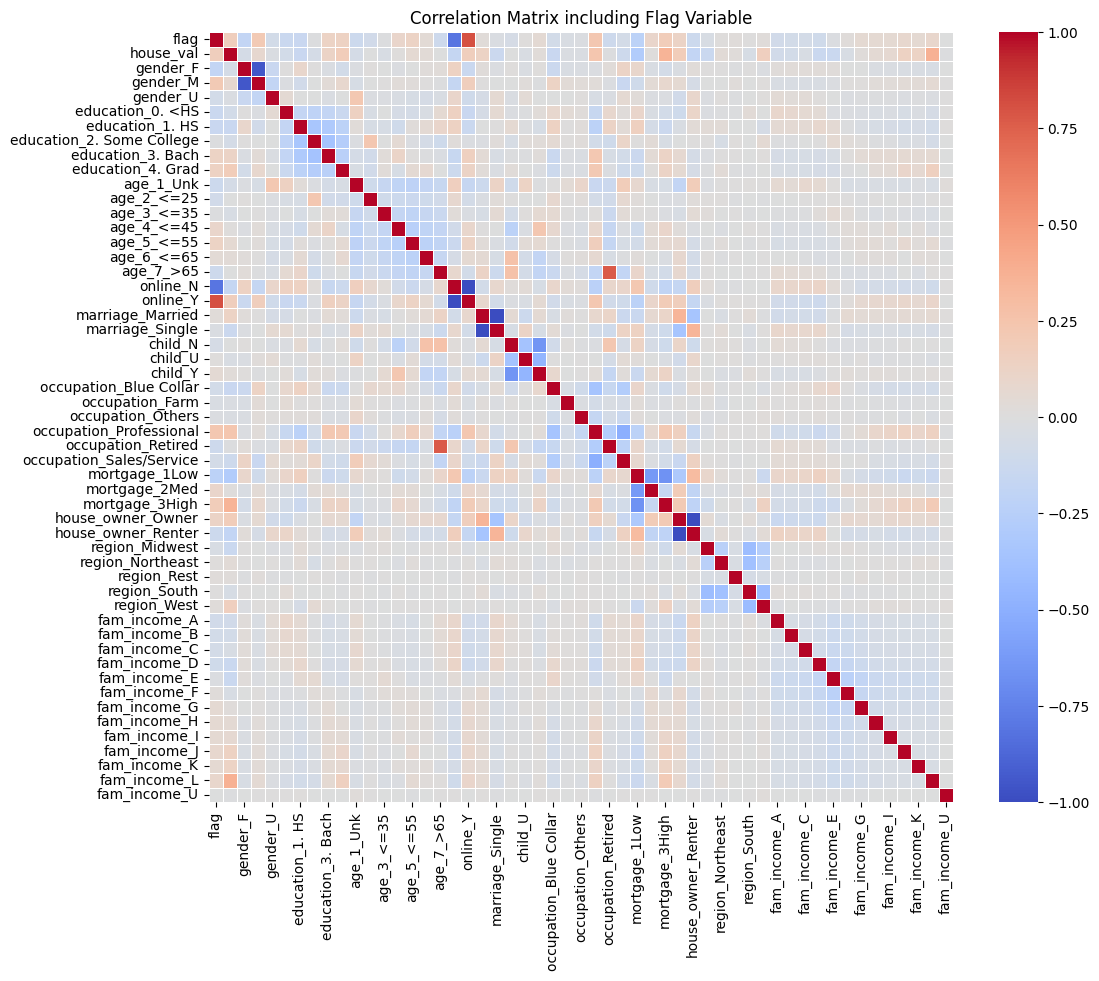

In [ ]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/sales_processed1.csv')
# Convert 'flag' to numeric 0 and 1
label_encoder = LabelEncoder()
data['flag'] = label_encoder.fit_transform(data['flag'])

# Identify categorical variables for one-hot encoding (excluding 'flag' as it's already encoded)
categorical_vars = data.select_dtypes(include=['object']).columns

# Perform one-hot encoding on categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_vars)

# Calculate the correlation matrix
correlation_matrix = data_encoded.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix including Flag Variable')
plt.show()


**Visualization - 5**

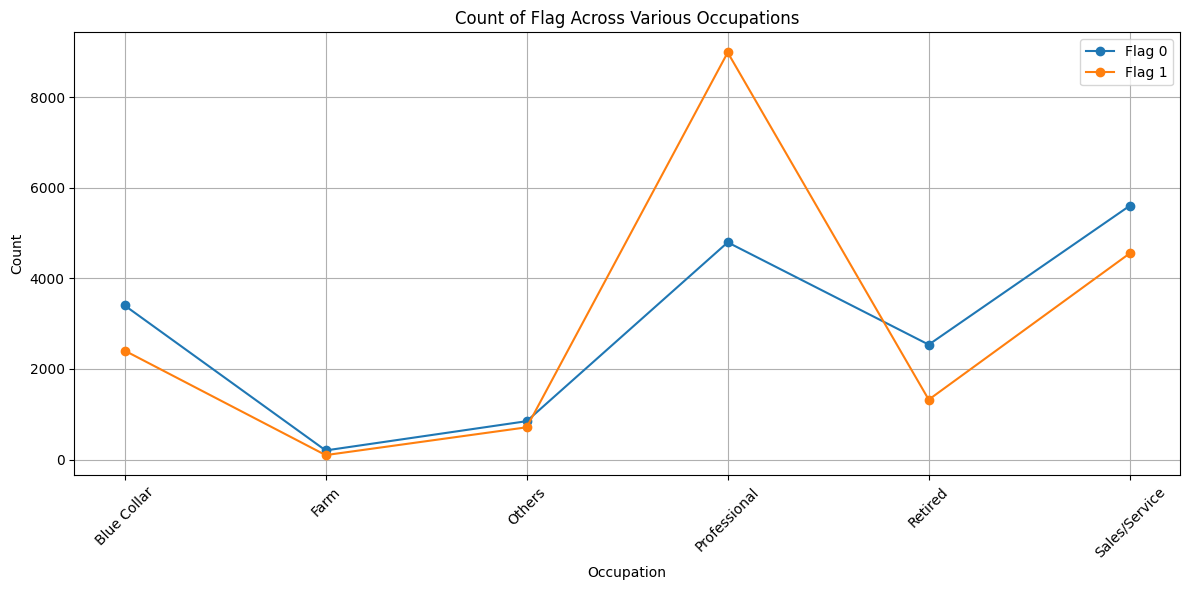

In [ ]:

# Grouping the data by 'occupation' and 'flag' and count the occurrences
occupation_flag_counts = data.groupby(['occupation', 'flag']).size().reset_index(name='count')

# Pivot the grouped data
occupation_flag_pivot = occupation_flag_counts.pivot(index='occupation', columns='flag', values='count').fillna(0)

# Plotting the data using a line graph
plt.figure(figsize=(12, 6))
for flag_status in occupation_flag_pivot.columns:
    plt.plot(occupation_flag_pivot.index, occupation_flag_pivot[flag_status], marker='o', label=f'Flag {flag_status}')

plt.title('Count of Flag Across Various Occupations')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


**Dummy coding**

In [ ]:
import pandas as pd
sales_data_path = '/content/sales_processed1.csv'
sales_data = pd.read_csv(sales_data_path)

sales_data['flag'] = sales_data['flag'].map({'Y': 1, 'N': 0})

# Columns identified for dummy encoding (excluding 'flag' since it's already processed in the before step)
categorical_columns = [
    'gender', 'education', 'age', 'online',
    'marriage', 'child', 'occupation',
    'mortgage', 'house_owner', 'region', 'fam_income'
]

# Apply dummy encoding directly within the original DataFrame
# This updates the DataFrame to include dummy variables in place of the original ones
sales_data = pd.get_dummies(sales_data, columns=categorical_columns, drop_first=True)

# Save the updated DataFrame, now ready for Random Forest Classifier, to a new CSV file
encoded_data_path = 'sales_data_encoded.csv'
sales_data.to_csv(encoded_data_path, index=False)





# **Random Forest Classification**

In [ ]:
# Random Forest Classifier

df = pd.read_csv ('sales_data_encoded.csv')
X = df.drop(['flag'], axis=1)
y = df['flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40423910)

rf_model = RandomForestClassifier(random_state=42, oob_score=True)

print("Default hyperparameter values:")
print(rf_model.get_params())

y_pred_before_tuning = rf_model.fit(X_train, y_train).predict(X_test)
report_before_tuning = classification_report(y_test, y_pred_before_tuning)
print("Performance Metrics Before Hyperparameter Tuning:")
print(report_before_tuning)

# Calculate the out-of-bag score
oob_score = rf_model.oob_score_
print(f'OOB Score: {oob_score}')





Default hyperparameter values:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': True, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Performance Metrics Before Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      3513
           1       0.95      0.81      0.88      3578

    accuracy                           0.88      7091
   macro avg       0.89      0.88      0.88      7091
weighted avg       0.89      0.88      0.88      7091

OOB Score: 0.8873452981206587


**Hyperparameter Optimization - 1**
(Number of Trees)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=40423910, oob_score=True)
rf_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_model.predict(X_test)
# Output the performance metrics


print(f"Random Forest Classifier Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Number of trees (n_estimators) used: {rf_model.n_estimators}")

# Calculate and print the out-of-bag score
print(f'OOB Score: {rf_model.oob_score_}')

Random Forest Classifier Accuracy: 0.8840784092511634
Number of trees (n_estimators) used: 500
OOB Score: 0.889108282500617


**Grid Search**

In [ ]:
# Defining the parameter grid with updated parameters
param_grid = {
    'n_estimators': [5, 10, 15, 20],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [1, 5, 10,15],
    'min_samples_leaf': [1, 5, 10,15],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Instantiating the RandomForestClassifier with oob_score=True
rf_model = RandomForestClassifier(random_state=40423910, oob_score=True)

# Setting up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', refit=True, verbose=1)

# Fitting GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Accessing the best accuracy and parameters
best_accuracy = grid_search.best_score_
best_params = grid_search.best_params_

print(f"Best Accuracy: {best_accuracy}")
print("Best Parameters:", best_params)

# Additional step to demonstrate OOB score usage if needed
# Since GridSearchCV instantiates models without oob_score enabled, you might directly instantiate a model with the best parameters to demonstrate OOB score, if necessary.
best_model = RandomForestClassifier(**best_params, random_state=40423910, oob_score=True)
best_model.fit(X_train, y_train)
print(f'OOB Score of the best model: {best_model.oob_score_}')


Fitting 5 folds for each of 768 candidates, totalling 3840 fits


Streaming output truncated to the last 5000 lines.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/di

Best Accuracy: 0.8963720772212522
Best Parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 20}
OOB Score of the best model: 0.8925989915729347


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


**Importance Plot-1**

house_val                    0.053392
gender_M                     0.044131
gender_U                     0.001733
education_1. HS              0.006884
education_2. Some College    0.001403
education_3. Bach            0.004728
education_4. Grad            0.007511
age_2_<=25                   0.003721
age_3_<=35                   0.001784
age_4_<=45                   0.005716
age_5_<=55                   0.011967
age_6_<=65                   0.002235
age_7_>65                    0.002543
online_Y                     0.764680
marriage_Single              0.003293
child_U                      0.002329
child_Y                      0.001881
occupation_Farm              0.000438
occupation_Others            0.000911
occupation_Professional      0.024986
occupation_Retired           0.005118
occupation_Sales/Service     0.001663
mortgage_2Med                0.005514
mortgage_3High               0.017327
house_owner_Renter           0.003770
region_Northeast             0.001549
region_Rest 

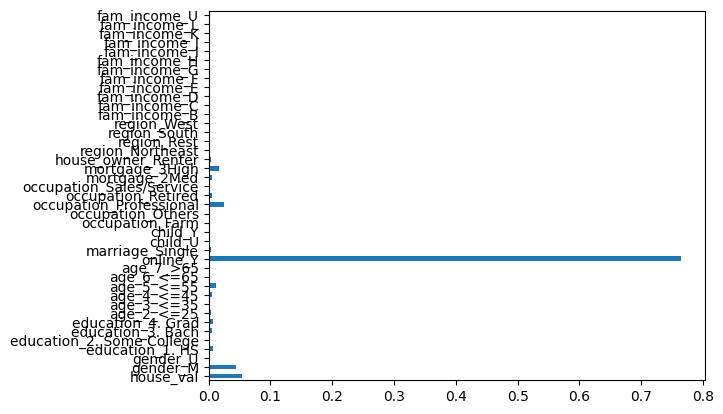

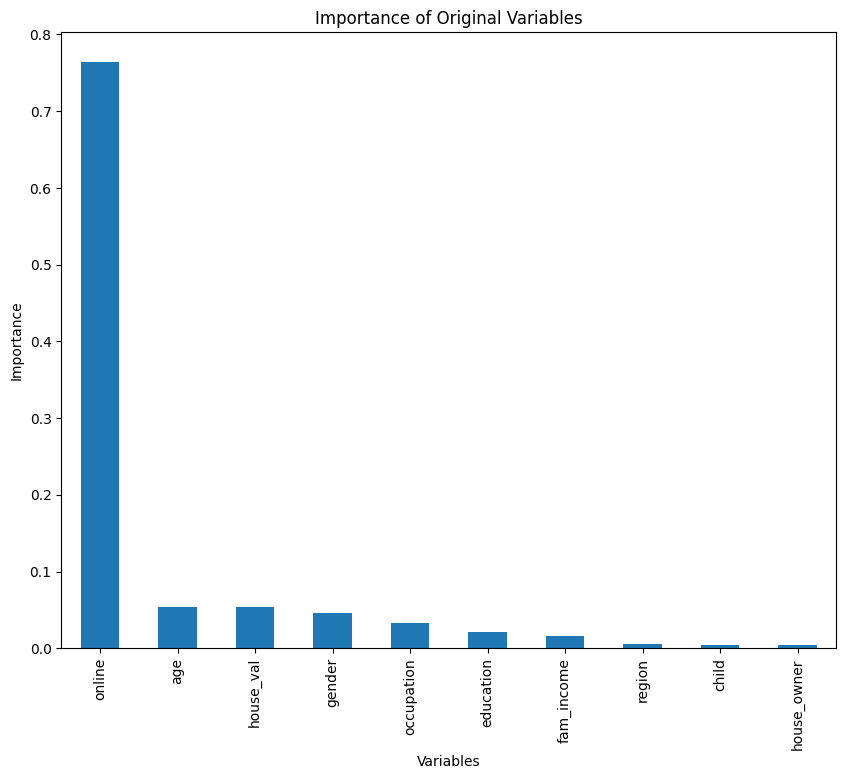

In [ ]:
#Featuring importances from the best model
importances = pd.Series(best_model.feature_importances_, index=X_train.columns)
print(importances)
importances.plot(kind='barh')
plt.show()

# Assuming original_columns represent the original features before encoding
original_columns = ['gender', 'marriage', 'occupation', 'house_owner', 'region', 'fam_income', 'child', 'education', 'online', 'mortage', 'age']
dummy_columns = X_train.columns  # Dummy variables in the training set

# Mapping Dummy Variables to Original Variables
mapping = {dummy: original for original in original_columns for dummy in dummy_columns if original in dummy}

# Aggregatting Importances
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': best_model.feature_importances_})
feature_importances['original_feature'] = feature_importances['feature'].map(mapping).fillna(feature_importances['feature'])
aggregated_importances = feature_importances.groupby('original_feature')['importance'].sum().sort_values(ascending=False)

# Importance Plot for Aggregated Importances
plt.figure(figsize=(10, 8))
aggregated_importances.plot(kind='bar')
plt.title('Importance of Original Variables')
plt.ylabel('Importance')
plt.xlabel('Variables')
plt.show()

**Probability estimates of the positive class**

In [ ]:
y_score = best_model.predict_proba(X_test)[:, 1]


**Compute the ROC Curve and ROC Area**

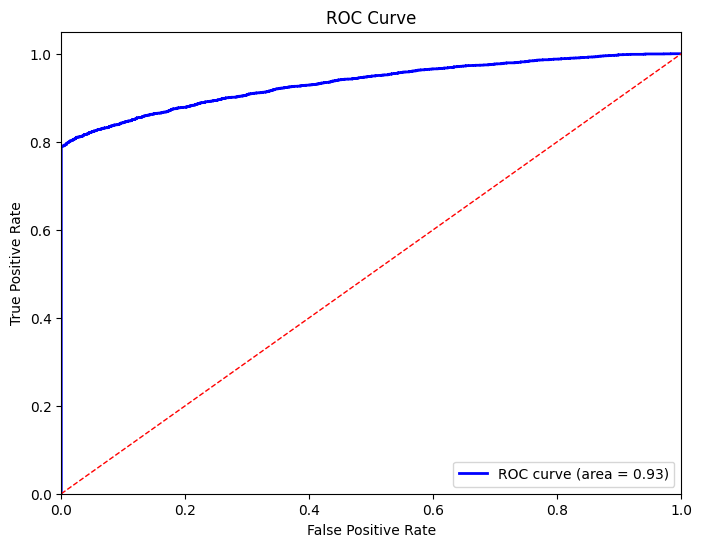

In [ ]:
y_score = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

**Compute the F1 Score Curve**

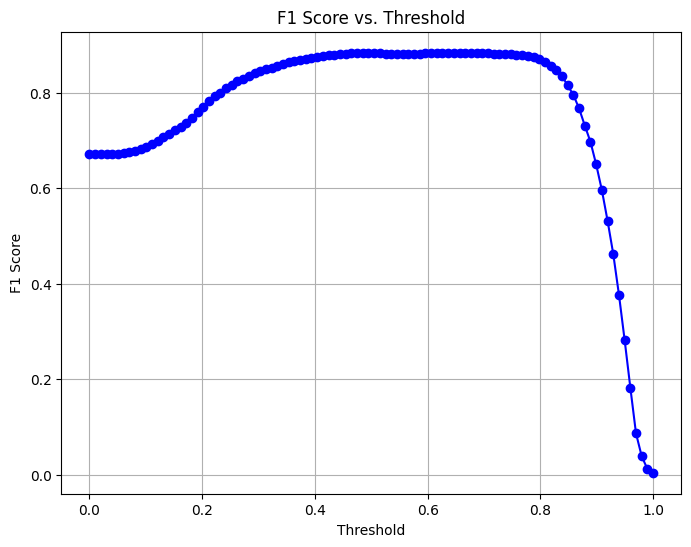

In [ ]:
f1_scores = []
for threshold in thresholds:
    y_pred = (y_score >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred))


# Plotting the F1 scores against thresholds
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores, marker='o', linestyle='-', color='blue')
plt.title('F1 Score vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()

**Compute the Confusion Matrix**

<ipython-input-56-a3bf012c82a1>:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 600x600 with 0 Axes>

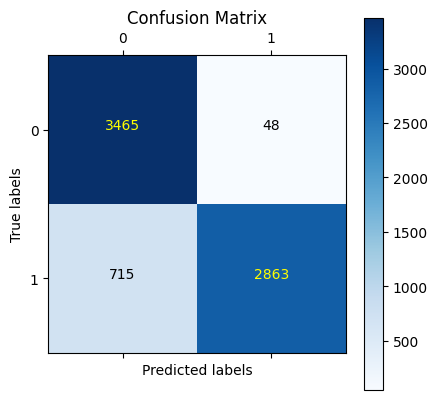

In [ ]:
y_pred_binary = (y_score >= 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(6, 6))
conf_matrix_img = plt.matshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar(conf_matrix_img)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Adding text annotation
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment="center", color="yellow" if conf_matrix[i, j] > conf_matrix.max() / 2. else "black")

plt.tight_layout()
plt.show()

**SVM**


Installing packages

In [ ]:
import  pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import RobustScaler

**Importing Data**

In [ ]:
df_encoded= pd.read_csv('sales_data_encoded.csv')

**Splitting Of Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['flag'], axis=1), df_encoded['flag'], test_size=0.2, random_state=40423910)


**Scaling**

In [ ]:
# Scale the data
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**SVM Classifier**

In [ ]:
svm_model = svm.SVC()

**Define the hyperparameter grid to search**

In [ ]:
hyperparameters = {'kernel': ['linear'],
                   'C': [0.01, 0.1],
                   'gamma': [0.01, 0.1]}

**Grid Search**

In [ ]:
grid_search = GridSearchCV(svm_model, hyperparameters, cv=5) #scoring='roc_auc'
grid_search.fit(X_train_scaled, y_train)

**Using the best model to make predictions on the test data**

In [ ]:
best_classifier = grid_search.best_estimator_
print(best_classifier,'\n')
y_pred = best_classifier.predict(X_test_scaled)

**Confusion Matrix**

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

**Feature importance plot**

In [ ]:
import matplotlib.pyplot as plt
# Print the coefficients of the hyperplane
coefficients = best_classifier.coef_
print(coefficients,'\n')
coefficients = abs(coefficients)
print(coefficients,'\n')
# Display the coefficients
#import matplotlib.pyplot as plt
#%matplotlib inline

fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x=X_train.columns, y=coefficients.reshape(-1))
ax.set_title("Feature Importance Plot")
plt.show()

Artifical Neural Network

ANN Model -1

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
df = pd.read_csv('sales_data_encoded.csv')



X = df.drop(['flag'], axis=1)
y = df['flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40423910)


# Define the neural network architecture
clf_ANNC = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

clf_ANNC.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

# Train the model
history = clf_ANNC.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


# Predict on the test set
y_pred_nn = clf_ANNC.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int)

# Evaluate the model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))
print("\nAccuracy of Neural Network Classifier:", accuracy_nn)
print("\nClassification Report:\n", classification_report(y_test, y_pred_nn))


ANN Model - 2

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
data = pd.read_csv('sales_data_encoded.csv')
# Convert 'flag' to numeric
label_encoder = LabelEncoder()
data['flag'] = label_encoder.fit_transform(data['flag'])

# Spliting the dataset (features and target variable)
X = data.drop('flag', axis=1)
y = data['flag']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=40423910)

# Building the ANN
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')

])

# Compiling  the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predict on the test set
y_pred_nn = model.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int)

# Evaluate the model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
class_report_nn = classification_report(y_test, y_pred_nn)

print("\nConfusion Matrix:\n", conf_matrix_nn)
print("\nAccuracy of Neural Network Classifier:", accuracy_nn)
print("\nClassification Report:\n", class_report_nn)


ANN Model - 3

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
data = pd.read_csv('sales_data_encoded.csv')
# Convert 'flag' to numeric
label_encoder = LabelEncoder()
data['flag'] = label_encoder.fit_transform(data['flag'])

# Spliting the dataset (features and target variable)
X = data.drop('flag', axis=1)
y = data['flag']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=40423910)

# Building the ANN
model = Sequential([
    Dense(1000 , activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')

])

# Compiling  the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predict on the test set
y_pred_nn = model.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int)

# Evaluate the model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
class_report_nn = classification_report(y_test, y_pred_nn)

print("\nConfusion Matrix:\n", conf_matrix_nn)
print("\nAccuracy of Neural Network Classifier:", accuracy_nn)
print("\nClassification Report:\n", class_report_nn)